In [1]:
import pandas as pd
data = pd.read_csv("titles.csv")
data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,In this Concert he focuses on the star and mos...,2021,NaN,103,"['romance', 'music']",['PR'],NaN,NaN,NaN,NaN,8.425,8.1
3290,tm1067128,Algo Azul,MOVIE,Romantic comedy...coming soon.,2021,NaN,90,['comedy'],['PA'],NaN,tt9257620,5.9,50.0,1.400,2.0
3291,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,['comedy'],[],NaN,tt15532762,NaN,NaN,NaN,NaN
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,Comedy special starring winners of the second ...,2021,NaN,28,['comedy'],[],NaN,tt15532736,NaN,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3294 non-null   object 
 1   title                 3294 non-null   object 
 2   type                  3294 non-null   object 
 3   description           3282 non-null   object 
 4   release_year          3294 non-null   int64  
 5   age_certification     2086 non-null   object 
 6   runtime               3294 non-null   int64  
 7   genres                3294 non-null   object 
 8   production_countries  3294 non-null   object 
 9   seasons               756 non-null    float64
 10  imdb_id               2968 non-null   object 
 11  imdb_score            2922 non-null   float64
 12  imdb_votes            2911 non-null   float64
 13  tmdb_popularity       3261 non-null   float64
 14  tmdb_score            3026 non-null   float64
dtypes: float64(5), int64(

In [3]:
data = data.drop(['age_certification', 'seasons'], axis = 1)

In [4]:
data = data.dropna()

In [5]:
data.describe()

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,2751.000000,2751.000000,2751.000000,2.751000e+03,2751.000000,2751.000000
mean,1999.727735,86.961105,6.890440,6.837176e+04,23.871678,6.859324
std,23.006095,36.209676,1.045165,1.797821e+05,96.697138,1.044608
min,1918.000000,3.000000,1.500000,5.000000e+00,0.050393,1.000000
25%,1992.000000,60.000000,6.300000,1.441000e+03,4.786000,6.200000
50%,2008.000000,93.000000,7.000000,1.005500e+04,9.787000,6.900000
75%,2017.000000,110.000000,7.600000,5.294550e+04,19.571000,7.550000
max,2022.000000,251.000000,9.400000,2.555504e+06,4447.894000,10.000000


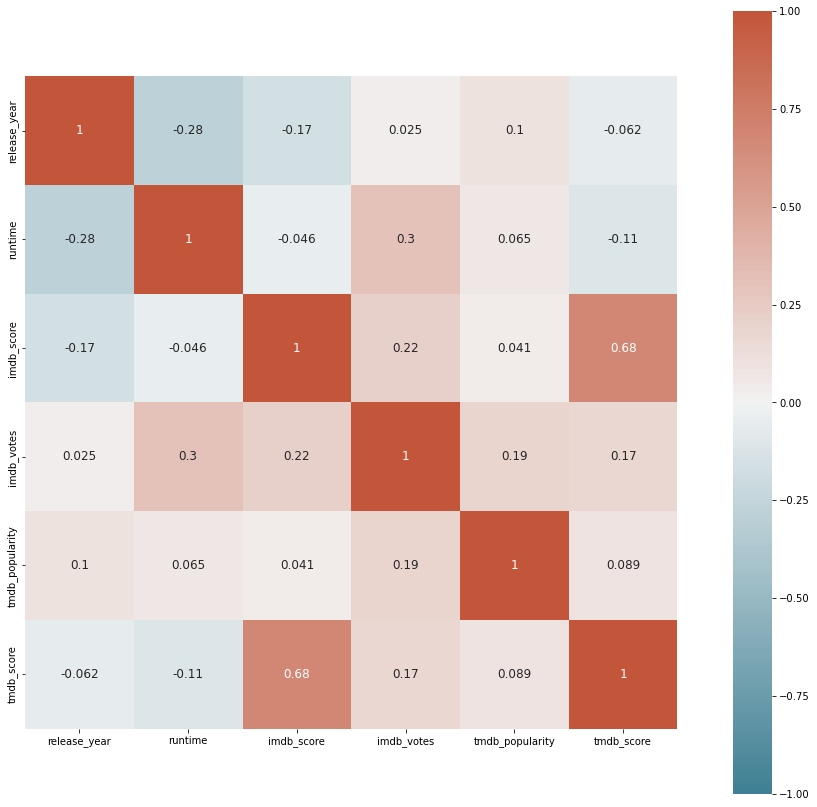

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_map(data):
    corr = data.corr()
    s, ax = plt.subplots(figsize = (20,12))
    cmap = sns.diverging_palette(220,20,as_cmap = True)
    s = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap = cmap,
        square = True,
        cbar_kws = {'shrink' : 1.2},
        ax = ax,
        annot = True,
        annot_kws = {'fontsize' : 12},    
    )
plot_correlation_map(data)

+imdb_score and tmbd score => similar rating in the two plateforms
+runtime and votes => runtime important for votes
-runtime and release date => not important
-runtime and tmbd score => runtime important for tmdb

In [25]:
data.nlargest(n = 10, columns = 'imdb_score')

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1038,ts17149,Band of Brothers,SHOW,Drawn from interviews with survivors of Easy C...,2001,59,"['war', 'drama', 'history', 'action']",['US'],tt0185906,9.4,440706.0,62.034,8.4
2531,ts88632,Chernobyl,SHOW,The true story of one of the worst man-made ca...,2019,65,"['drama', 'history', 'thriller', 'documentation']",['US'],tt7366338,9.4,693955.0,64.507,8.6
725,tm119206,The Shawshank Redemption,MOVIE,Framed in the 1940s for the double murder of h...,1994,142,"['crime', 'drama']",['US'],tt0111161,9.3,2548100.0,66.224,8.7
1030,ts22047,The Wire,SHOW,Told from the points of view of both the Balti...,2002,59,"['drama', 'thriller', 'crime']",['US'],tt0306414,9.3,325150.0,36.030,8.5
669,ts16786,Eyes on the Prize,SHOW,The definitive story of the Civil Rights era f...,1987,57,"['documentation', 'history']",['US'],tt0092999,9.2,656.0,1.770,8.5
712,ts20995,The Sopranos,SHOW,The story of New Jersey-based Italian-American...,1999,55,"['drama', 'crime']",['US'],tt0141842,9.2,372367.0,151.628,8.5
1706,ts2,Game of Thrones,SHOW,Seven noble families fight for control of the ...,2011,58,"['scifi', 'action', 'drama', 'fantasy', 'roman...",['US'],tt0944947,9.2,1983794.0,492.101,8.4
1878,ts20233,Rick and Morty,SHOW,Rick is a mentally-unbalanced but scientifical...,2013,22,"['scifi', 'action', 'animation', 'comedy']",['US'],tt2861424,9.2,473951.0,238.434,8.8
1042,ts21482,Fullmetal Alchemist: Brotherhood,SHOW,Edward and Alphonse Elric's reckless disregard...,2009,29,"['scifi', 'action', 'animation', 'comedy', 'dr...",['JP'],tt1355642,9.1,156503.0,110.534,8.7
722,ts13503,Batman: The Animated Series,SHOW,"Vowing to avenge the murder of his parents, Br...",1992,22,"['action', 'crime', 'family', 'scifi', 'animat...",['US'],tt0103359,9.0,99730.0,52.197,8.5


In [26]:
data.nlargest(n = 10, columns = 'tmdb_score')

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
6,ts225761,Tom and Jerry,SHOW,Tom and Jerry is an American animated franchis...,1940,8,"['animation', 'comedy', 'family', 'action']",['US'],tt12158994,7.7,853.0,1.400000,10.0
524,tm82110,American Revolution 2,MOVIE,American Revolution 2 begins with footage of t...,1969,76,['documentation'],['US'],tt0477558,6.5,83.0,1.200000,10.0
704,tm762332,Mike Mulligan and His Steam Shovel,MOVIE,"After many years of working together, Mike and...",1990,25,"['animation', 'family']",[],tt0242684,7.7,42.0,0.870000,10.0
984,ts15128,Crashbox,SHOW,Crashbox is a Canadian-American educational ch...,1999,26,"['animation', 'family']","['US', 'CA']",tt0321777,8.5,341.0,6.175000,10.0
1023,tm164662,Goodnight Moon & Other Sleepytime Tales,MOVIE,Margaret Wise Brown and Clement Hurd's bestsel...,1999,27,"['family', 'animation', 'fantasy']",['US'],tt0239438,7.6,69.0,1.960000,10.0
1501,ts14603,Category 7: The End of the World,SHOW,Category 7: The End Of The World follows the c...,2005,86,"['drama', 'scifi', 'thriller', 'action', 'come...",['US'],tt0468988,4.5,2767.0,0.050393,10.0
1830,ts191698,Little Baby Bum,SHOW,Little Baby Bum is a fun and educational show ...,2011,5,"['animation', 'family', 'music']",['GB'],tt10051854,6.4,94.0,2.728000,10.0
2063,tm473166,Santana: Corazón Live from Mexico - Live It T...,MOVIE,"Includes the concert film, a “making of the co...",2014,133,['music'],['US'],tt4195232,8.0,22.0,1.502000,10.0
2244,ts41505,Dios Inc.,SHOW,A researcher's life changes when he discovers ...,2016,51,['thriller'],"['US', 'MX']",tt5625508,6.3,65.0,0.649000,10.0
2248,ts79504,Secret Life of Lakes,SHOW,Our planet’s lakes make up a huge freshwater r...,2015,52,['documentation'],['US'],tt6951510,7.9,10.0,1.168000,10.0


diff btw imdb and tmdb

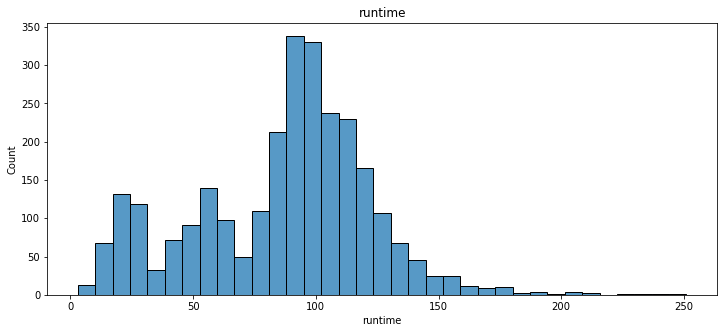

In [42]:
plt.figure(figsize=(12,5))
plt.title('runtime')
ax = sns.histplot(data["runtime"])

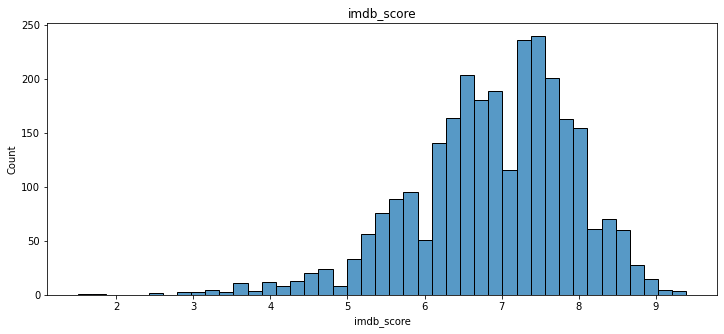

In [43]:
plt.figure(figsize=(12,5))
plt.title('imdb_score')
ax = sns.histplot(data["imdb_score"])

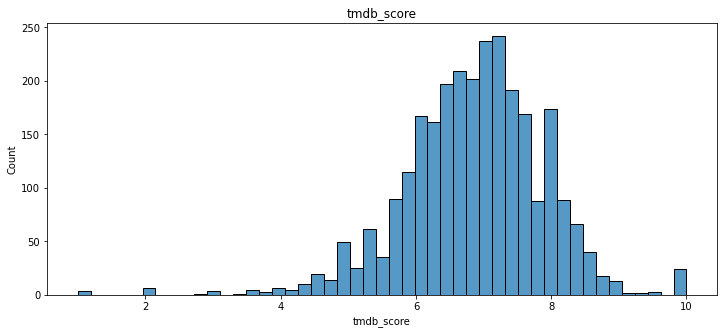

In [44]:
plt.figure(figsize=(12,5))
plt.title('tmdb_score')
ax = sns.histplot(data["tmdb_score"])

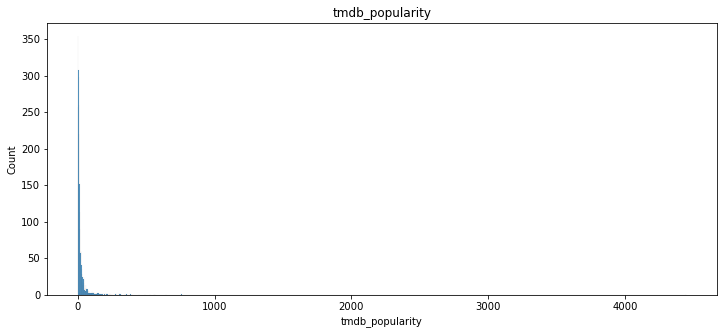

In [52]:
plt.figure(figsize=(12,5))
plt.title('tmdb_popularity')
ax = sns.histplot(data["tmdb_popularity"])

In [32]:
data_ = pd.read_csv('credits.csv')
data_

,person_id,id,name,character,role
0,60017,tm155702,Judy Garland,Dorothy Gale,ACTOR
1,53496,tm155702,Ray Bolger,Hunk / Scarecrow,ACTOR
2,79549,tm155702,Jack Haley,Hickory / Tin Man,ACTOR
3,79548,tm155702,Bert Lahr,Zeke / Cowardly Lion,ACTOR
4,60995,tm155702,Margaret Hamilton,Elmira Gulch / Wicked Witch of the West,ACTOR
...,...,...,...,...,...
66388,1224011,tm1067128,Stella Lauri,Marta,ACTOR
66389,2305342,tm1067128,Fabiola Sánchez,Claudia,ACTOR
66390,1245864,tm1067128,Ash Olivera,Nora,ACTOR
66391,2305203,tm1067128,Mariel Garcia Spooner,NaN,DIRECTOR


In [34]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66393 entries, 0 to 66392
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  66393 non-null  int64 
 1   id         66393 non-null  object
 2   name       66393 non-null  object
 3   character  61888 non-null  object
 4   role       66393 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.5+ MB


In [38]:
data_.dropna()

,person_id,id,name,character,role
0,60017,tm155702,Judy Garland,Dorothy Gale,ACTOR
1,53496,tm155702,Ray Bolger,Hunk / Scarecrow,ACTOR
2,79549,tm155702,Jack Haley,Hickory / Tin Man,ACTOR
3,79548,tm155702,Bert Lahr,Zeke / Cowardly Lion,ACTOR
4,60995,tm155702,Margaret Hamilton,Elmira Gulch / Wicked Witch of the West,ACTOR
...,...,...,...,...,...
66386,2305720,tm1067128,Hugo Victor Rodriguez,Oficial Contreras,ACTOR
66387,2305322,tm1067128,Juan Carlos Avendaño,Oficial Jaramillo,ACTOR
66388,1224011,tm1067128,Stella Lauri,Marta,ACTOR
66389,2305342,tm1067128,Fabiola Sánchez,Claudia,ACTOR


In [39]:
data_.describe()

,person_id
count,6.639300e+04
mean,3.479124e+05
std,5.539732e+05
min,7.000000e+00
25%,1.754400e+04
50%,7.037900e+04
75%,4.835320e+05
max,2.369354e+06


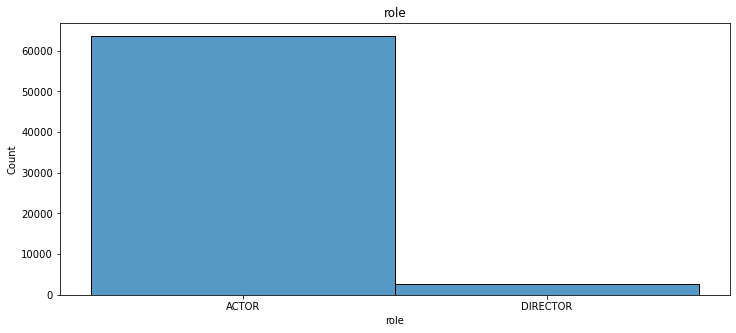

In [41]:
plt.figure(figsize=(12,5))
plt.title('role')
ax = sns.histplot(data_["role"])

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
def data_extraction(data):
    with open(data, 'r', encoding = None) as rf:
        filelines = rf.read().split('/n')
        filedata = [line.split('/t') for line in filelines]
        fileheader = filedata[0]
        filedata = filedata[1:]
    return fileheader, filedata
headerofnodes, data_ofnode = data_extraction('nodes.tsv')
headerofnodes, data_ofnode = data_extraction('nodes.tsv')

FileNotFoundError: [Errno 2] No such file or directory: 'nodes.tsv'